1. Analyzing all the statistical indicators of dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("coffee-sales.csv")
df = df.dropna(subset=['coffee_name', 'money'])
grouped_stats = df.groupby('coffee_name')['money'].agg(['mean', 'median', 'std', 'min', 'max', 'sum', 'count'])
grouped_stats['cv'] = (grouped_stats['std'] / grouped_stats['mean']) * 100
print(grouped_stats)
mean_value = df['money'].mean()
std_dev = df['money'].std()
cv = (std_dev / mean_value) * 100
print(f"Total coefficient of variation (CV): {cv:.2f}%")

                                 mean  median       std    min   max  \
coffee_name                                                            
Americano                   26.068712   25.96  1.942499  23.02  30.0   
Americano with Milk         30.651204   30.86  2.014770  27.92  35.0   
Americano with milk         25.000000   25.00  0.000000  25.00  25.0   
Cappuccino                  35.917174   35.76  2.138369  30.00  40.0   
Caramel coffee              28.000000   28.00       NaN  28.00  28.0   
Caramel with Irish whiskey  28.000000   28.00  0.000000  28.00  28.0   
Caramel with chocolate      28.000000   28.00  0.000000  28.00  28.0   
Caramel with milk           25.000000   25.00       NaN  25.00  25.0   
Chocolate                   25.000000   25.00       NaN  25.00  25.0   
Chocolate with coffee       30.000000   30.00  0.000000  30.00  30.0   
Chocolate with milk         27.000000   27.00  0.000000  27.00  27.0   
Cocoa                       35.704348   35.76  1.417267  32.82  

2. Calculating the percentage of the type of drink to the total amount.

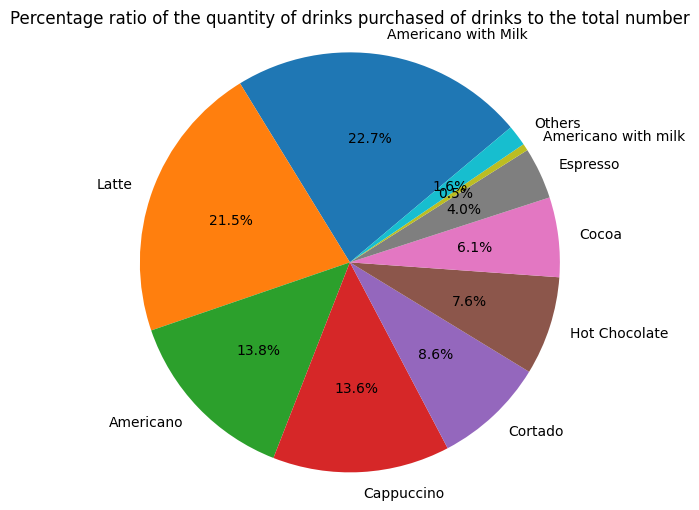

In [5]:
if 'coffee_name' in df.columns:
    coffee_counts = df['coffee_name'].value_counts()
    coffee_counts_filtered = coffee_counts[coffee_counts >= 10]
    other_count = coffee_counts[coffee_counts < 10].sum()
    if other_count > 0:
        coffee_counts_filtered['Others'] = other_count
    coffee_percentage = coffee_counts_filtered / len(df) * 100
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(coffee_percentage, labels=coffee_percentage.index, autopct='%1.1f%%', startangle=40)
    plt.title('Percentage ratio of the quantity of drinks purchased of drinks to the total number')
    plt.axis('equal')
    plt.show()

3. Analyzing what time of day the most drinks were bought

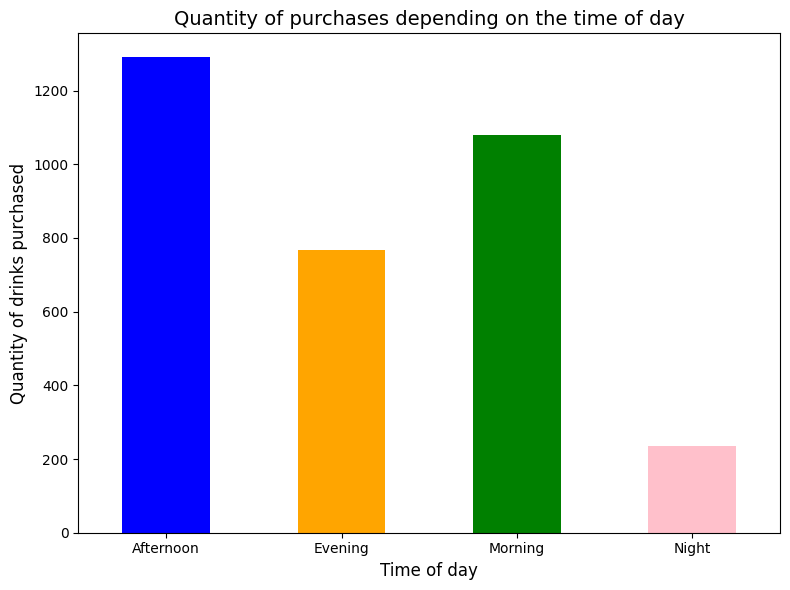

In [6]:
# Creating a function to determine the periods of the day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'  # 5:00 - 11:59
    elif 12 <= hour < 18:
        return 'Afternoon'  # 12:00 - 17:59
    elif 18 <= hour < 22:
        return 'Evening'  # 18:00 - 21:59
    else:
        return 'Night'  # 22:00 - 4:59
# Main code
df['hour_only'] = pd.to_datetime(df['time_only'], format='%H:%M:%S').dt.hour
df['time_of_day'] = df['hour_only'].apply(time_of_day)
time_of_day_sales = df.groupby('time_of_day').size()
plt.figure(figsize=(8, 6))
time_of_day_sales.plot(kind='bar', color=['blue', 'orange', 'green', 'pink'])
plt.title('Quantity of purchases depending on the time of day', fontsize=14)
plt.xlabel('Time of day', fontsize=12)
plt.ylabel('Quantity of drinks purchased', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4. Finding which payment method is more popular

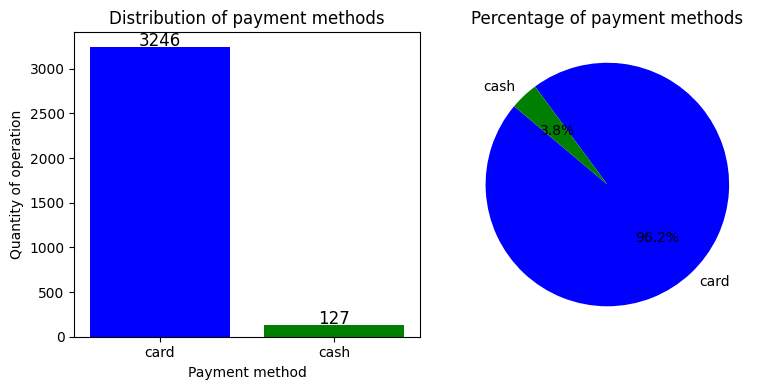

In [7]:
payment_counts = df['cash_type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].bar(payment_counts.index, payment_counts.values, color=['blue', 'green'])
axes[0].set_xlabel("Payment method")
axes[0].set_ylabel("Quantity of operation")
axes[0].set_title("Distribution of payment methods")
for i, v in enumerate(payment_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=12)
axes[1].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['blue', 'green'], startangle=140)
axes[1].set_title("Percentage of payment methods")
plt.tight_layout()
plt.show()

5. Analyzing the popularity of coffee depending on the payment method

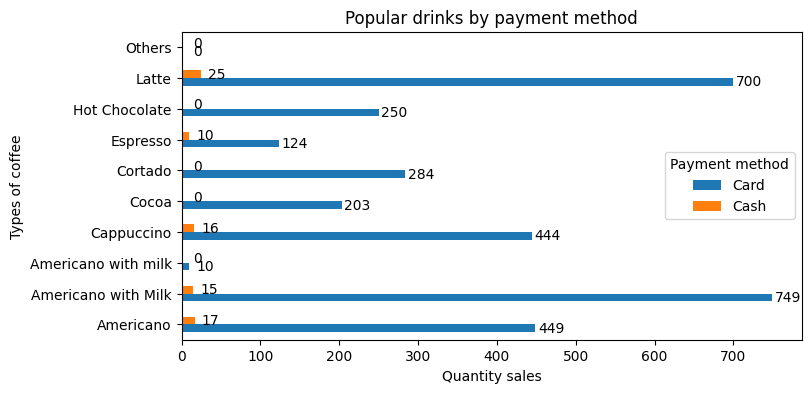

In [8]:
coffee_payment_counts = df.groupby(['coffee_name', 'cash_type']).size().unstack(fill_value=0)
for column in coffee_payment_counts.columns:
    coffee_payment_counts[column] = coffee_payment_counts[column].apply(lambda x: x if x >= 10 else 0)
others = coffee_payment_counts[coffee_payment_counts.sum(axis=1) < 10].sum(axis=0)
coffee_payment_counts = coffee_payment_counts[coffee_payment_counts.sum(axis=1) >= 10]
coffee_payment_counts.loc['Others'] = others
ax = coffee_payment_counts.plot(kind='barh', stacked=False, figsize=(8, 4), color=['#1f77b4', '#ff7f0e'])
plt.title('Popular drinks by payment method')
plt.xlabel('Quantity sales')
plt.ylabel('Types of coffee')
plt.legend(title='Payment method', labels=['Card', 'Cash'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 20, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                fontsize=10, color='black')
plt.show()

6. Looking for peak hours and the average check at different times of the day.

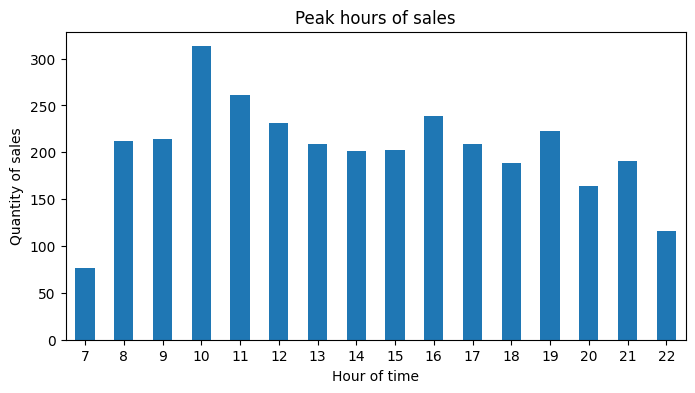

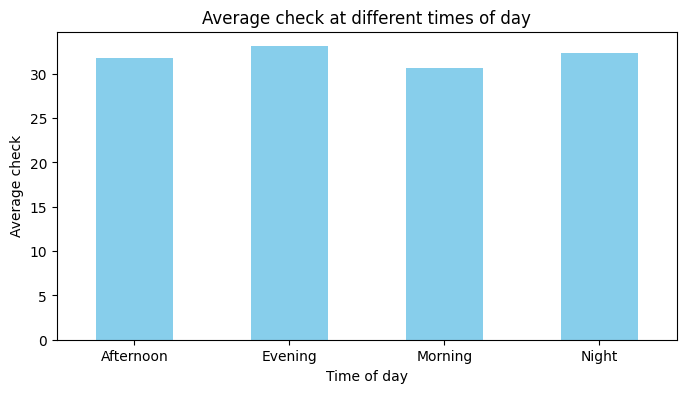

In [112]:
df['time_only'] = pd.to_datetime(df['time_only'])
df['hour'] = df['time_only'].dt.hour
sales_by_hour = df.groupby('hour').size()

plt.figure(figsize=(8, 4))
sales_by_hour.plot(kind='bar')
plt.title("Peak hours of sales")
plt.xlabel("Hour of time")
plt.ylabel("Quantity of sales")
plt.xticks(rotation=0)
plt.show()

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(time_of_day)

avg_check_by_time_of_day = df.groupby('time_of_day')['money'].mean()

plt.figure(figsize=(8, 4))
avg_check_by_time_of_day.plot(kind='bar', color='skyblue')
plt.title("Average check at different times of day")
plt.xlabel("Time of day")
plt.ylabel("Average check")
plt.xticks(rotation=0)
plt.show()

7. Researching into seasonality of demand

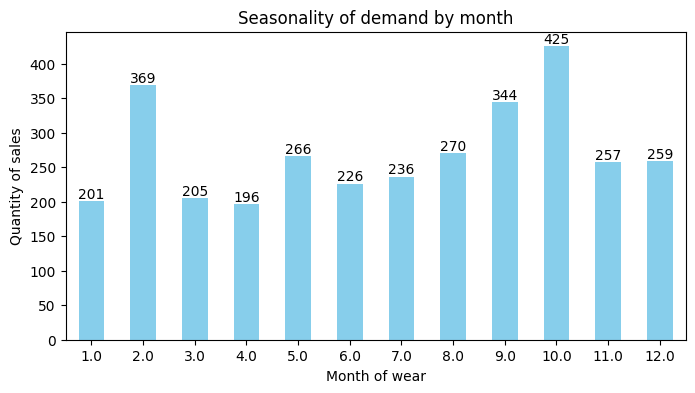

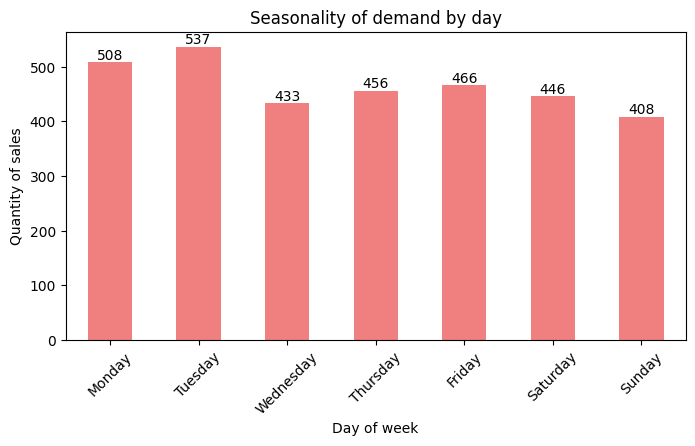

In [9]:
df['date_only'] = pd.to_datetime(df['date_only'])
df['month'] = df['date_only'].dt.month
df['day_of_week'] = df['date_only'].dt.day_name()

sales_by_month = df.groupby('month').size()
plt.figure(figsize=(8, 4))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title("Seasonality of demand by month")
plt.xlabel("Month of wear")
plt.ylabel("Quantity of sales")
plt.xticks(rotation=0)
for i, value in enumerate(sales_by_month):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week = df.groupby('day_of_week').size()
sales_by_day_of_week = sales_by_day_of_week[order_of_days]

plt.figure(figsize=(8, 4))
sales_by_day_of_week.plot(kind='bar', color='lightcoral')
plt.title("Seasonality of demand by day")
plt.xlabel("Day of week")
plt.ylabel("Quantity of sales")
plt.xticks(rotation=45)
for i, value in enumerate(sales_by_day_of_week):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

8. Analyze intervals between purchases to identify patterns in attendance

Average interval between purchases: 0.29 min
Median interval between purchases: 0.20 min
Standard deviation of intervals: 0.38 min


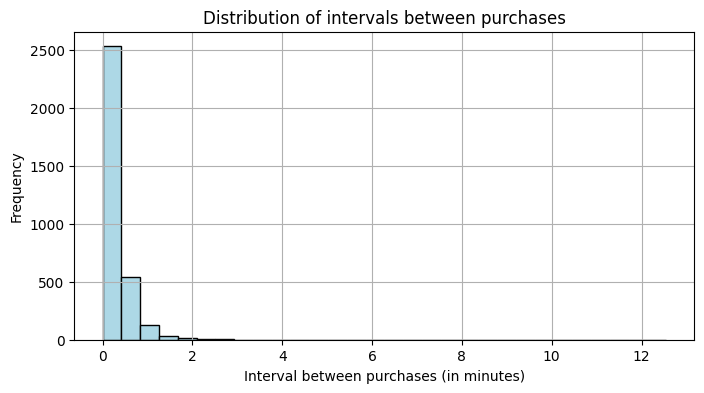

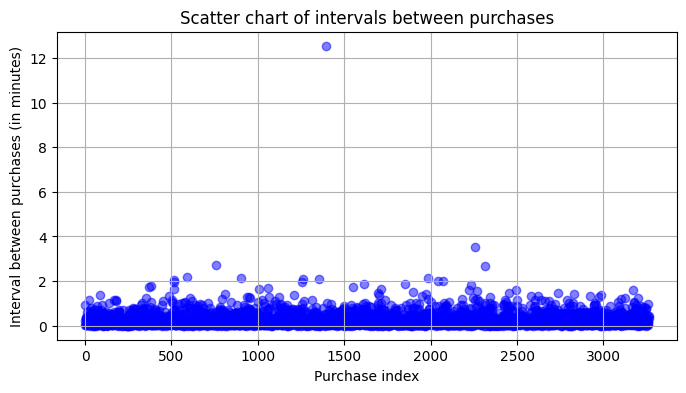

In [118]:
df = df.sort_values(by='time_only')
df['time_diff'] = df['time_only'].diff().dt.total_seconds()
df = df.dropna(subset=['time_diff'])
df['time_diff_minutes'] = df['time_diff'] / 60 

mean_interval = df['time_diff_minutes'].mean()
median_interval = df['time_diff_minutes'].median()
std_interval = df['time_diff_minutes'].std()

print(f"Average interval between purchases: {mean_interval:.2f} min")
print(f"Median interval between purchases: {median_interval:.2f} min")
print(f"Standard deviation of intervals: {std_interval:.2f} min")

plt.figure(figsize=(8, 4))
plt.hist(df['time_diff_minutes'], bins=30, color='lightblue', edgecolor='black')
plt.title("Distribution of intervals between purchases")
plt.xlabel("Interval between purchases (in minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['time_diff_minutes'], color='blue', alpha=0.5)
plt.title("Scatter chart of intervals between purchases")
plt.xlabel("Purchase index")
plt.ylabel("Interval between purchases (in minutes)")
plt.grid(True)
plt.show()


9. Analyze the trend of coffee sales by time

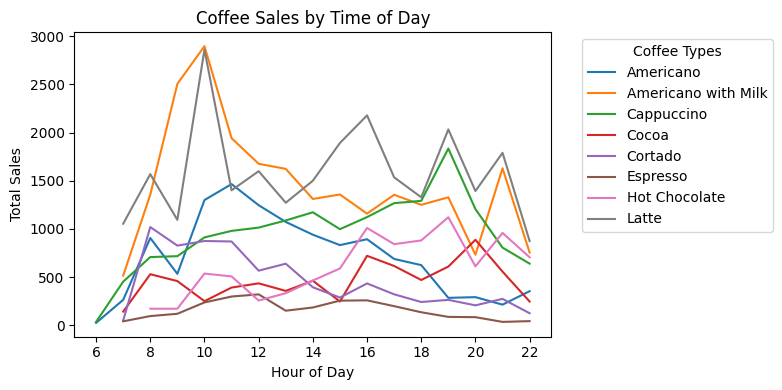

In [22]:
coffee_sales_by_time.plot(kind='line', figsize=(8, 4))
plt.title('Coffee Sales by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.legend(title='Coffee Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()